In [ ]:
import numpy as np

# Create a sample user-item matrix (rows: users, columns: items)
user_item_matrix = np.array([[1, 0, 1, 1],
                              [1, 0, 2, 3],
                              [5, 2, 3, 3],
                              [4, 1, 0, 2]])

# Calculate similarity matrix using cosine similarity
def cosine_similarity(matrix):
    similarity_matrix = np.zeros((matrix.shape[0], matrix.shape[0]))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            if i == j:
                similarity_matrix[i, j] = 1
            else:
                similarity_matrix[i, j] = np.dot(matrix[i], matrix[j]) / (np.linalg.norm(matrix[i]) * np.linalg.norm(matrix[j]))
    return similarity_matrix

similarity_matrix = cosine_similarity(user_item_matrix)

# Make recommendations for a given user
def make_recommendations(user_id, user_item_matrix, similarity_matrix, k=2):
    user_vector = user_item_matrix[user_id]
    weighted_sum = np.zeros(user_item_matrix.shape[1])
    sum_of_weights = np.zeros(user_item_matrix.shape[1])

    # Calculate weighted sum and sum of weights
    for i in range(user_item_matrix.shape[0]):
        if i != user_id:
            weighted_sum += similarity_matrix[user_id, i] * user_item_matrix[i]
            sum_of_weights += np.abs(similarity_matrix[user_id, i])

    # Calculate the recommendation scores
    recommendation_scores = weighted_sum / sum_of_weights

    # Sort the recommendation scores in descending order
    sorted_indices = np.argsort(recommendation_scores)[::-1]

    # Get the top k item indices to recommend
    top_indices = [i for i in sorted_indices if user_vector[i] == 0][:k]

    return top_indices

# Make recommendations for user 0
user_id = 0
k = 2
recommendations = make_recommendations(user_id, user_item_matrix, similarity_matrix, k)
print("Recommended items for user", user_id, ":", recommendations)

Recommended items for user 0 : [1]


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Reading Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
# import pandas as pd
# header = ['user_id','item_id','rating','timestamp']
# dataset = pd.read_csv('u.data',sep = 't',names = header)
# print(dataset.head())

import pandas as pd
!ls
!cat u.data
# !cat u.data
dataset = pd.read_csv('ml-100k/u.data',sep = '\t',names = header)
# dataset = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
print(dataset.head())
# header = ['user_id','item_id','rating','timestamp']
# dataset = pd.read_csv('u.data',sep = '\t',names = header)`
# print(dataset.head())
# import pandas as pd
# !ls
# !cat u.data
# header = ['user_id','item_id','rating','timestamp']
# dataset = pd.read_csv('rate.csv.xlsx',sep = 't',names = header)
# print(dataset.head())



Streaming output truncated to the last 5000 lines.
589	326	1	883352600
561	160	3	885808904
757	426	3	888467270
943	230	1	888693158
616	327	3	891224558
887	756	5	881379094
768	301	5	883835026
880	186	4	880174808
851	1254	1	875730895
178	268	4	884837324
795	154	3	881529904
276	413	3	877934705
551	660	3	892783672
758	13	5	881977205
67	1047	3	875379750
495	1	4	888632943
918	340	1	891986174
556	321	4	882135994
521	174	4	884478721
866	303	4	891221165
416	122	3	886315885
5	373	3	875635907
918	971	4	891987780
534	118	4	877807935
875	428	4	876465112
620	393	5	889988196
483	258	4	878950353
802	569	3	875985840
256	597	4	882152509
49	404	3	888067765
500	13	5	883865232
648	1337	3	884367366
454	387	2	888267279
221	1208	3	875247565
498	77	2	881961627
924	429	4	886760020
815	229	3	878695527
650	174	4	891369479
525	147	3	881085893
848	199	5	887042341
755	301	3	882569771
697	237	5	882622414
559	300	4	891035137
775	333	4	891033022
798	815	5	875295695
398	8	3	875716709
456	324	4	881372687
727	472	2	883709

NameError: name 'header' is not defined

In [ ]:
n_users = dataset.user_id.unique().shape[0]
n_items = dataset.item_id.unique().shape[0]
n_items = dataset['item_id'].max()
A = np.zeros((n_users,n_items))
for line in dataset.itertuples():
    A[line[1]-1,line[2]-1] = line[3]
print("Original rating matrix : ",A)

Original rating matrix :  [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [ ]:
for i in range(len(A)):
  for j in range(len(A[0])):
    if A[i][j]>=3:
      A[i][j]=1
    else:
      A[i][j]=0

In [ ]:
csr_sample = csr_matrix(A)
print(csr_sample)

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 27)	1.0
  (0, 29)	1.0
  :	:
  (942, 624)	1.0
  (942, 654)	1.0
  (942, 671)	1.0
  (942, 684)	1.0
  (942, 716)	1.0
  (942, 720)	1.0
  (942, 721)	1.0
  (942, 731)	1.0
  (942, 738)	1.0
  (942, 762)	1.0
  (942, 764)	1.0
  (942, 793)	1.0
  (942, 795)	1.0
  (942, 807)	1.0
  (942, 815)	1.0
  (942, 823)	1.0
  (942, 824)	1.0
  (942, 839)	1.0
  (942, 927)	1.0
  (942, 942)	1.0
  (942, 1043)	1.0
  (942, 1073)	1.0
  (942, 1187)	1.0
  (942, 1227)	1.0
  (942, 1329)	1.0


In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [ ]:
dataset_sort_des = dataset.sort_values(['user_id', 'timestamp'], ascending=[True, False])
filter1 = dataset_sort_des[dataset_sort_des['user_id'] == 1].item_id
filter1 = filter1.tolist()
filter1 = filter1[:20]
print("Items liked by user: ",filter1)
# Item-based Collaborative Filtering generator recommendation
# Next, for each item being liked by the user1, we recommend 2 similar items. The number of similar items to be recommended can vary depending on the need of the system.

distances1=[]
indices1=[]
for i in filter1:
  distances , indices = knn.kneighbors(csr_sample[i],n_neighbors=3)
  indices = indices.flatten()
  indices= indices[1:]
  indices1.extend(indices)
print("Items to be recommended: ",indices1)

Items liked by user:  [74, 102, 256, 5, 171, 111, 242, 189, 32, 209, 270, 18, 6, 244, 221, 129, 20, 271, 272, 255]
Items to be recommended:  [356, 500, 758, 512, 883, 893, 473, 17, 311, 566, 771, 283, 614, 105, 904, 163, 510, 501, 642, 406, 473, 17, 578, 475, 312, 845, 688, 778, 681, 550, 275, 879, 365, 371, 685, 928, 719, 283, 373, 331]


In [ ]:
import networkx as nx
import csv
import sys

DEBUG = False

# This method reads the graph structure from the input file
def buildG(G, file_, delimiter_):
    # construct the weighted version of the contact graph from the input file
    with open(file_, 'r') as f:
        reader = csv.reader(f, delimiter=delimiter_)
        for line in reader:
            if len(line) > 2:
                if float(line[2]) != 0.0:
                    # line format: u,v,w
                    G.add_edge(int(line[0]), int(line[1]), weight=float(line[2]))
            else:
                # line format: u,v
                G.add_edge(int(line[0]), int(line[1]), weight=1.0)


# This method keeps removing edges from Graph until one of the connected components of Graph splits into two
# compute the edge betweenness
def cmtyGirvanNewmanStep(G):
    if DEBUG:
        print("Running cmtyGirvanNewmanStep method ...")
    init_ncomp = nx.number_connected_components(G)  # no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')  # edge betweenness for G
        # find the edge with max centrality
        max_ = max(bw.values())
        # find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if v == max_:
                G.remove_edge(*k)  # remove the central edge
        ncomp = nx.number_connected_components(G)  # recalculate the no of components


# This method compute the modularity of current split
def girvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adjacency_matrix(G)
    New_deg = updateDeg(New_A, G.nodes())
    # Let's compute Q
    comps = nx.connected_components(G)  # list of components
    print('No of communities in decomposed G: {}'.format(nx.number_connected_components(G)))
    Mod = 0  # Modularity of a given partitioning
    for c in comps:
        EWC = 0  # no of edges within a community
        RE = 0  # no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]  # count the probability of a random edge
        Mod += (EWC - RE * RE / (2 * m_))
    Mod = Mod / (2 * m_)
    if DEBUG:
        print("Modularity: {}".format(Mod))
    return Mod


def updateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)
    B = A.sum(axis=1)
    for i, node_id in enumerate(nodes):
        deg_dict[node_id] = B[i, 0]
    return deg_dict


# This method runs Girvan-Newman algorithm and finds the best community split by maximizing the modularity measure
def runGirvanNewman(G, Orig_deg, m_):
    # Let's find the best split of the graph
    BestQ = 0.0
    Q = 0.0
    while True:
        cmtyGirvanNewmanStep(G)
        Q = girvanNewmanGetModularity(G, Orig_deg, m_)
        print("Modularity of decomposed G: {}".format(Q))
        if Q > BestQ:
            BestQ = Q
            Bestcomps = list(nx.connected_components(G))  # Best Split
            print("Identified components: {}".format(Bestcomps))
        if G.number_of_edges() == 0:
            break
    if BestQ > 0.0:
        print("Max modularity found (Q): {} and number of communities: {}".format(BestQ, len(Bestcomps)))
        print("Graph communities: {}".format(Bestcomps))
    else:
        print("Max modularity (Q):", BestQ)


def main(argv):
    if len(argv) < 2:
        sys.stderr.write("Usage: %s <input graph>\n" % (argv[0],))
        return 1
    graph_fn = argv[1]

    # Check if the file exists
    if not os.path.isfile(graph_fn):
        print(f"Error: File '{graph_fn}' not found.")
        return 1

    G = nx.Graph()  # let's create the graph first
    buildG(G, graph_fn, ',')

    if DEBUG:
        print('G nodes: {} & G no of nodes: {}'.format(G.nodes(), G.number_of_nodes()))

    n = G.number_of_nodes()  # |V|
    A = nx.adjacency_matrix(G)  # adjacency matrix

    m_ = 0.0  # the weighted version for the number of edges
    for i in range(0, n):
        for j in range(0, n):
            m_ += A[i, j]
    m_ = m_ / 2.0
    if DEBUG:
        print("m: {}".format(m_))

    # calculate the weighted degree for each node
    Orig_deg = updateDeg(A, G.nodes())

    # run Girvan-Newman algorithm
    runGirvanNewman(G, Orig_deg, m_)

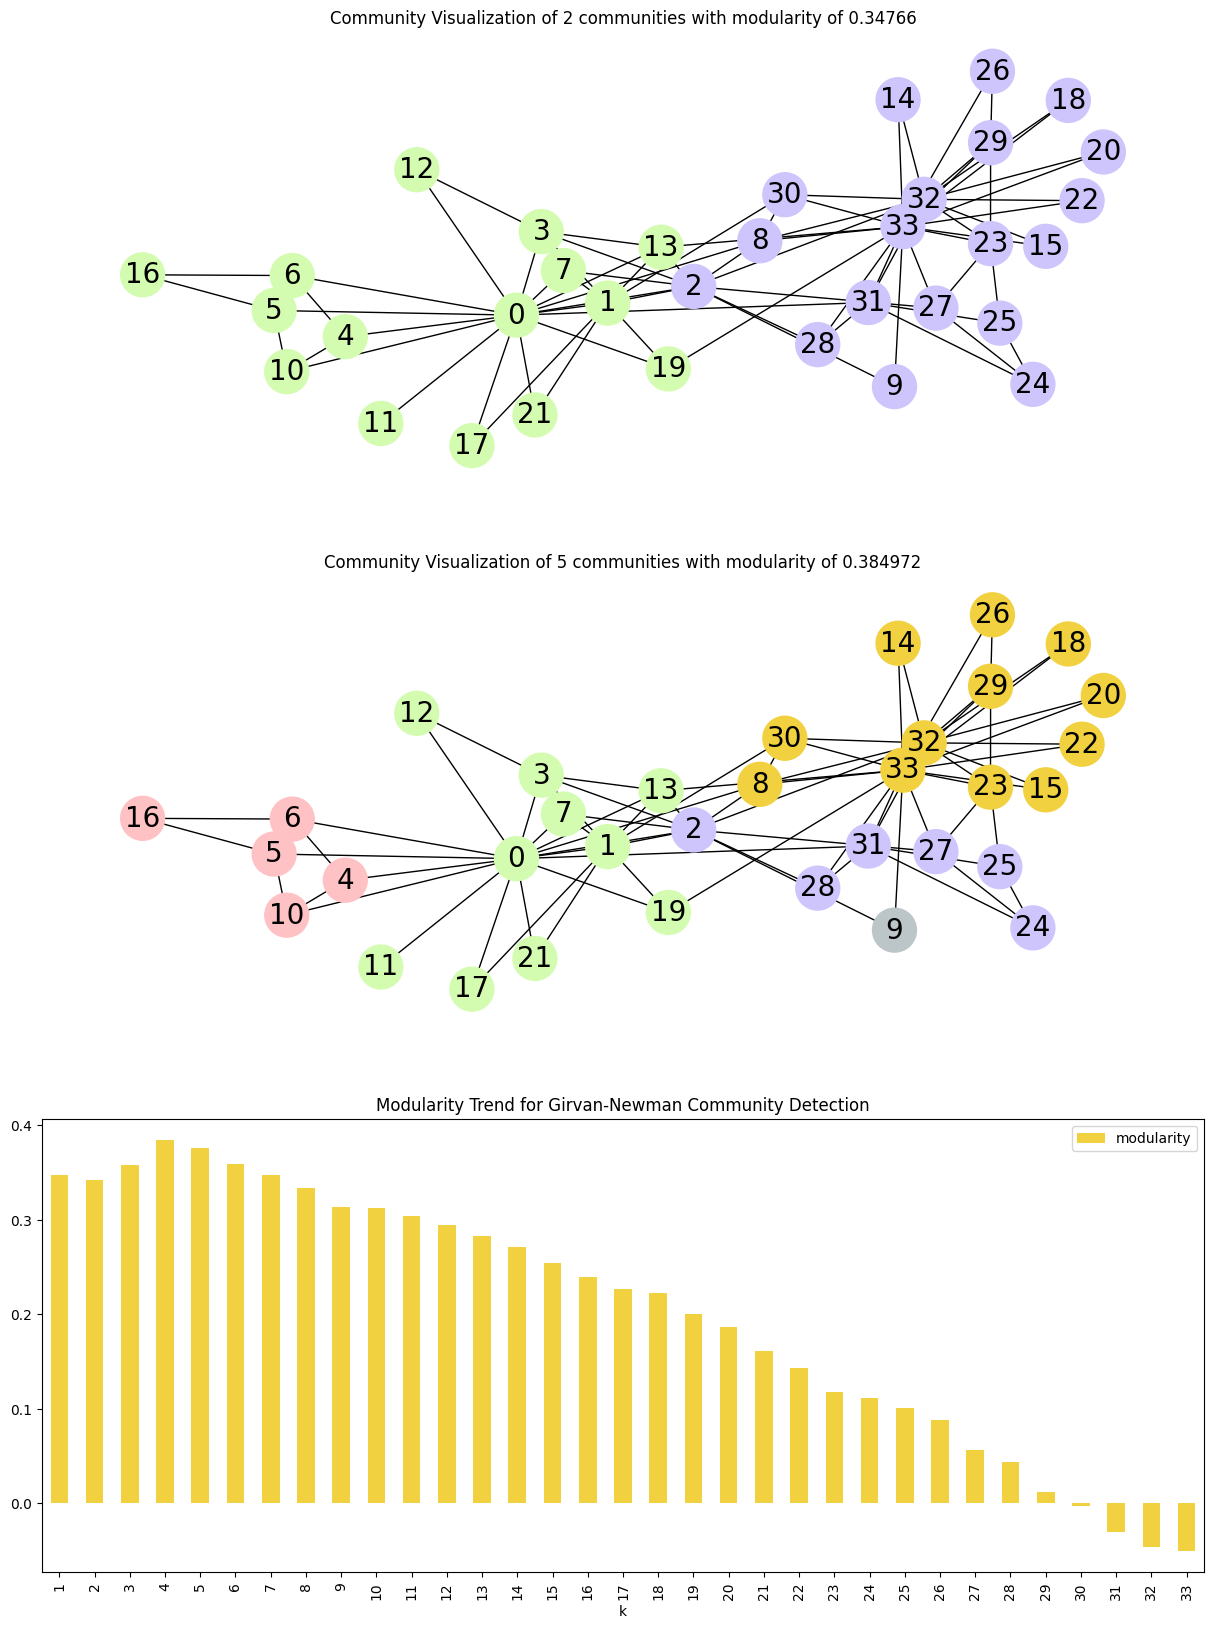

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

In [ ]:
import networkx as nx

def girvan_newman(G):

  while G.number_of_edges() > 0:

    betweenness = nx.edge_betweenness_centrality(G)
    edge_to_remove = max(betweenness, key=betweenness.get)


    G.remove_edge(*edge_to_remove)


    yield list(nx.connected_components(G))


G = nx.karate_club_graph()
communities = girvan_newman(G.copy())

for level, communities in enumerate(communities):
  print(f"Level {level+1}: {communities}")


Level 1: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 2: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 3: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 4: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 5: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 6: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 7: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Level 8: [{0, 1, 2, 3, 4, 5, 6, 7,

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


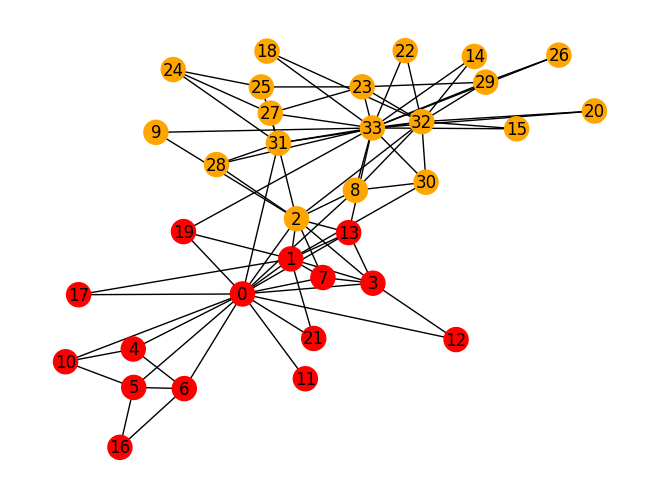

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = nx.karate_club_graph()
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
from collections import deque

def FS_unweightedGraph(Gmat, src):

    n = Gmat.shape[0]  # total number of vertices
    visited = [False] * n  # visited indicator to setup a queue (default=False)
    queue = deque()  # queue for BFS
    shDist = [float('inf')] * n  # shortest distances from the source
    nPaths = [0] * n  # number of shortest paths from the source
    prevVertexList = [[] for _ in range(n)]  # shortest paths will be stored

    # Initialize the source vertex
    shDist[src] = 0
    nPaths[src] = 1
    visited[src] = True
    queue.append(src)
    prevVertexList[src] = [-1]  # -1 means it is the source

    # BFS type algorithm
    while queue:
        curr = queue.popleft()  # get a current vertex from the queue

        # For all connected vertices
        for u in [i for i, x in enumerate(Gmat[curr]) if x == 1]:
            # If u is not visited, push it to the queue
            if not visited[u]:
                visited[u] = True
                queue.append(u)

            # Check if it is a better path
            if shDist[u] > shDist[curr] + 1:
                shDist[u] = shDist[curr] + 1
                nPaths[u] = nPaths[curr]
                prevVertexList[u] = [curr]
            elif shDist[u] == shDist[curr] + 1:
                # Check if additional shortest path is found
                nPaths[u] += nPaths[curr]
                prevVertexList[u].append(curr)

    return {
        "numVertexes": n,
        "source": src,
        "shDist": shDist,
        "nPaths": nPaths,
        "prevVertexList": prevVertexList
    }



In [ ]:
from collections import deque

def BFS_unweightedGraph_getPaths(BFSout, src, dest):
    """
    Extract the shortest paths (src -> dest) from a BFS output for a Graph and the src.

    Args:
        BFSout (dict): The output of a BFS traversal, containing the following keys:
            - 'numVertexes': The number of vertices in the graph.
            - 'source': The source vertex.
            - 'prevVertexList': A list of lists, where each inner list represents the previous vertices for a given vertex.
            - 'nPaths': A dictionary mapping each vertex to the number of shortest paths to that vertex.
        src (int): The source vertex.
        dest (int): The destination vertex.

    Returns:
        list: A list of lists, where each inner list represents a shortest path from the source to the destination.
    """
    n = BFSout['numVertexes']
    tmp = BFSout['source']
    if tmp != src:
        print("The source of BFSout is different from the input src. Check the sanity of input.")
        return []

    prevVertexList = BFSout['prevVertexList']
    numPaths = BFSout['nPaths'][dest]
    listPaths = [[] for _ in range(numPaths)]
    listPathsInd = 0

    # Backtracking
    q_branching = deque()     # queue for vertices with multiple prevVertexes (LIFO)
    q_newBranch = deque()     # additional prevVertexes at q_branching
    q_pastPath = []         # path up to the last q_branching
    currPath = []

    curr = dest                    # current vertex
    tmp = prevVertexList[curr][::-1]
    crawl = tmp[-1]
    crawlRight = tmp[:-1]
    q_branching.append(curr)
    q_newBranch.extend(crawlRight)
    currPath.append(curr)
    if crawlRight:
        q_pastPath.extend([currPath.copy() for _ in range(len(crawlRight))])

    # Stopping rule = (crawl == -1 (at the src) and q_branching is empty)
    while crawl != -1 or q_branching:
        curr = crawl           # Move to the previous vertex
        tmp = prevVertexList[curr][::-1]
        crawl = tmp[-1]
        crawlRight = tmp[:-1]
        q_branching.append(curr)
        q_newBranch.extend(crawlRight)
        currPath.append(curr)
        if crawlRight:
            q_pastPath.extend([currPath.copy() for _ in range(len(crawlRight))])

        # When it reached the src, report one shortest path
        if crawl == -1:
            # found one shortest path
            listPaths[listPathsInd] = currPath[::-1]
            listPathsInd += 1

            # Further if branching vertices remain, go to the last q_branching and remove queues.
            if q_branching:
                curr = q_branching.pop()
                crawl = q_newBranch.pop()
                currPath = q_pastPath.pop()

    return listPaths



In [ ]:
import numpy as np
from collections import deque

def get_edges(G_mat):
    edges = []
    n = G_mat.shape[0]
    for i in range(n):
        for j in np.where(G_mat[i, :] == 1)[0]:
            if j > i:
                edges.append([i, j])
    return edges

def my_edge_betweenness(G_adj_mat):
    n = G_adj_mat.shape[0]
    edge_list = get_edges(G_adj_mat)
    n_edges = len(edge_list)
    edge_betweenness = np.zeros(n_edges)
    n_sh_paths_mat = np.zeros((n, n))
    n_sh_paths_via_edge = np.zeros((n, n))
    betweenness_summand = np.zeros((n_edges, n*(n-1)//2))

    BFS_out = []
    for i in range(n):
        BFS_out.append(BFS_unweighted_graph(G_adj_mat, i))

    for i in range(n-1):
        for j in range(i+1, n):
            n_sh_paths_mat[i, j] = BFS_out[i]['n_paths'][j]

    for i in range(n-1):
        for j in range(i+1, n):
            paths_ij = BFS_unweighted_graph_get_paths(BFS_out[i], i, j)
            for k, e in enumerate(edge_list):
                count = 0
                for path in paths_ij:
                    for m in range(len(path)-1):
                        if all(path[m:m+2] == e) or all(path[m:m+2] == e[::-1]):
                            count += 1
                summand = count / n_sh_paths_mat[i, j]
                betweenness_summand[k, (i*(2*n-i-1))//2 + (j-i-1)] = summand

    edge_betweenness = np.sum(betweenness_summand, axis=1)

    edge_mat = np.full((2, n_edges), np.nan)
    for i, e in enumerate(edge_list):
        edge_mat[:, i] = e

    return {'edge_mat': edge_mat, 'edge_betweenness': edge_betweenness}

def is_connected(G_adj_mat):
    n = G_adj_mat.shape[0]
    BFS1 = BFS_unweighted_graph(G_adj_mat, 0)
    return not any(BFS1['n_paths'] == 0)

def girvan_newman_1step(G_mat):
    n = G_mat.shape[0]

    if not is_connected(G_mat):
        print("Input adj matrix is not connected, so it cannot be searched by this function.")
        return

    edge_list = get_edges(G_mat)
    edge_betweenness = my_edge_betweenness(G_mat)['edge_betweenness']
    ind = np.argmax(edge_betweenness)
    e = edge_list[ind]
    G_mat2 = G_mat.copy()
    G_mat2[e[0], e[1]] = 0
    G_mat2[e[1], e[0]] = 0
    is_connected_after = is_connected(G_mat2)

    return {'n': n, 'edge_list': edge_list, 'edge_betweenness': edge_betweenness,
            'removed_edge': e, 'out_adj_mat': G_mat2, 'is_connected': is_connected_after}

def BFS_unweighted_graph(G_adj_mat, start):
    n = G_adj_mat.shape[0]
    queue = deque([start])
    visited = [False] * n
    visited[start] = True
    n_paths = [0] * n
    n_paths[start] = 1
    while queue:
        u = queue.popleft()
        for v in np.where(G_adj_mat[u, :] == 1)[0]:
            if not visited[v]:
                visited[v] = True
                queue.append(v)
                n_paths[v] = n_paths[u]
            else:
                n_paths[v] += n_paths[u]
    return {'visited': visited, 'n_paths': n_paths}

def BFS_unweighted_graph_get_paths(BFS_out, start, end):
    paths = []
    queue = deque([(start, [start])])
    while queue:
        u, path = queue.popleft()
        if u == end:
            paths.append(path)
        else:
            for v in np.where(BFS_out['visited'])[0]:
                if BFS_out['n_paths'][v] > 0 and v not in path:
                    queue.append((v, path + [v]))
    return paths

